Check Tensorflow installation

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print ("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print ("Addition with constants: %i" % sess.run(a+b))
    print ("Multiplication with constants: %i" % sess.run(a*b))
    

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [3]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [4]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [5]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print ("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print ("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


Check Keras installation

In [6]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(100,)), # model.add(Dense(units=32, activation='relu', input_dim=100))
    Activation('relu'),
    Dense(10),
    Activation('softmax'), # model.add(Dense(units=10, activation='softmax'))
])

Using TensorFlow backend.


In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

In [8]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3530
Epoch 2/10
1000/1000 [==============================] - 0s 97us/step - loss: 2.3030
Epoch 3/10
1000/1000 [==============================] - 0s 94us/step - loss: 2.2865
Epoch 4/10
1000/1000 [==============================] - 0s 96us/step - loss: 2.2736
Epoch 5/10
1000/1000 [==============================] - 0s 94us/step - loss: 2.2606
Epoch 6/10
1000/1000 [==============================] - 0s 93us/step - loss: 2.2483
Epoch 7/10
1000/1000 [==============================] - 0s 88us/step - loss: 2.2331
Epoch 8/10
1000/1000 [==============================] - 0s 82us/step - loss: 2.2223
Epoch 9/10
1000/1000 [==============================] - 0s 83us/step - loss: 2.2080
Epoch 10/10
1000/1000 [==============================] - 0s 84us/step - loss: 2.1986


In [9]:
res = model.predict(np.random.random((1,100)))
loss = -np.log(res)
np.argmax(loss)

3

In [5]:
for n in range(1000):
    n_max = 1000
    divisor = 10
    if( n % (n_max/divisor) ==0 ):
        print('Scoring image {0:05}'.format(n/n_max))

Scoring image 000.0
Scoring image 000.1
Scoring image 000.2
Scoring image 000.3
Scoring image 000.4
Scoring image 000.5
Scoring image 000.6
Scoring image 000.7
Scoring image 000.8
Scoring image 000.9


In [1]:
import numpy
import keras
from keras_rcnn import datasets, models, preprocessing, utils
from keras_rcnn.datasets import shape

Using TensorFlow backend.


[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]]]
[[1 3 1 1 1 2 3 3 2 3 2]]
[1 3 1 1 1 2 3 3 2 3 2]


/home/claudio/Documents/venv/lib/python3.6/site-packages/scikit_image-0.14.0-py3.6-linux-x86_64.egg/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/claudio/Documents/venv/lib/python3.6/site-packages/scikit_image-0.14.0-py3.6-linux-x86_64.egg/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/claudio/Documents/venv/lib/python3.6/site-packages/scikit_image-0.14.0-py3.6-linux-x86_64.egg/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 

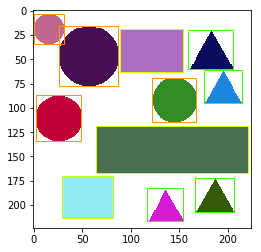

In [15]:
training_dictionary, test_dictionary = shape.load_data()

categories = {"circle": 1, "rectangle": 2, "triangle": 3}

generator = preprocessing.ObjectDetectionGenerator()

generator = generator.flow_from_dictionary(
    dictionary=training_dictionary,
    categories=categories,
    target_size=(224, 224)
)

validation_data = preprocessing.ObjectDetectionGenerator()

validation_data = validation_data.flow_from_dictionary(
    dictionary=test_dictionary,
    categories=categories,
    target_size=(224, 224)
)

target, _ = generator.next()

target_bounding_boxes, target_categories, target_images, target_masks, target_metadata = target

target_bounding_boxes = numpy.squeeze(target_bounding_boxes)

target_images = numpy.squeeze(target_images)
print(target_categories)
target_categories = numpy.argmax(target_categories, -1)
print(target_categories)
target_categories = numpy.squeeze(target_categories)

print(target_categories)

utils.show_bounding_boxes(target_images, target_bounding_boxes, target_categories)

In [3]:
target

[array([[[119.,  12., 150.,  43.],
         [127., 177., 166., 222.],
         [167.,  31., 216.,  75.],
         [ 41., 103.,  80., 148.],
         [ 39.,  33., 108., 112.],
         [174., 188., 220., 220.],
         [  9.,  75.,  45., 116.],
         [  8.,  22.,  38.,  56.],
         [ 86., 113., 120., 152.],
         [121.,  77., 216., 172.],
         [ 59.,   9.,  88.,  42.],
         [ 14., 180.,  46., 222.],
         [ 69., 152., 132., 215.],
         [ 12., 134.,  52., 178.]]]), array([[[0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]]), array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1.

In [ ]:
# keras_rcnn.
model = models.RCNN((224, 224, 3), ["circle", "rectangle", "triangle"])

In [ ]:
optimizer = keras.optimizers.Adam()

model.compile(optimizer)

In [ ]:
model.fit_generator(
    epochs=10,
    generator=generator,
    validation_data=validation_data
)